<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY9143HPML/blob/main/Pytorch/8_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [6]:
# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim = 1)
y = x.pow(2) + 0.1 * torch.normal(torch.zeros(* x.size()))

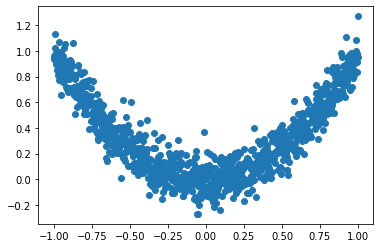

In [8]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [9]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset = torch_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers=2)

In [10]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(1, 20)
    self.predict = torch.nn.Linear(20, 1)

  def forward(self, x):
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


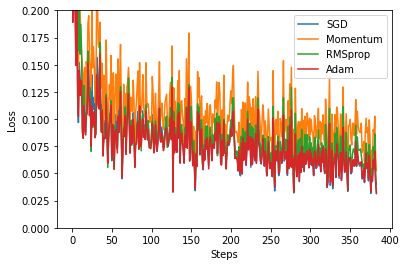

In [13]:
if __name__ == '__main__':
  net_SGD = Net()
  net_Momentum = Net()
  net_RMSprop = Net()
  net_Adam = Net()
  nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

  # different optimizers
  opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr = LR)
  opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr = LR)
  opt_RMSprop = torch.optim.SGD(net_RMSprop.parameters(), lr = LR)
  opt_Adam = torch.optim.SGD(net_Adam.parameters(), lr = LR)
  optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

  loss_func = torch.nn.MSELoss()
  losses_his = [[], [], [], []] # record loss

  # training
  for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (b_x, b_y) in enumerate(loader):
      for net, opt, l_his in zip(nets, optimizers, losses_his):
        output = net(b_x)
        loss = loss_func(output, b_y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        l_his.append(loss.data.numpy())
  labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
  for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label = labels[i])
  plt.legend(loc = 'best')
  plt.xlabel('Steps')
  plt.ylabel('Loss')
  plt.ylim((0, 0.2))
  plt.show()